# Detecting Auction Shill bidding through unsupervised learning

In [ ]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data Loading


In [179]:
# Importing dataset
dataset = pd.read_csv('Shill Bidding Dataset.csv')

In [ ]:
# Display dataset shape
dataset.shape

(6321, 13)

In [ ]:
# Display first few rows of the dataset
dataset.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [ ]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [ ]:
# Display dataset statistical summary
dataset.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Feature Selection
We focus on continuous behavioral features (columns 3 to 12) for clustering analysis, excluding identifier columns (Record_ID, Auction_ID, Bidder_ID). This is an unsupervised learning analysis - no class labels are used.


In [182]:
# Focusing on continuous behavioral features, excluding identifier columns
# Note: This is unsupervised learning - no class labels are used in the analysis
key_dataset = dataset.iloc[:, 3:-1]
key_dataset.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7


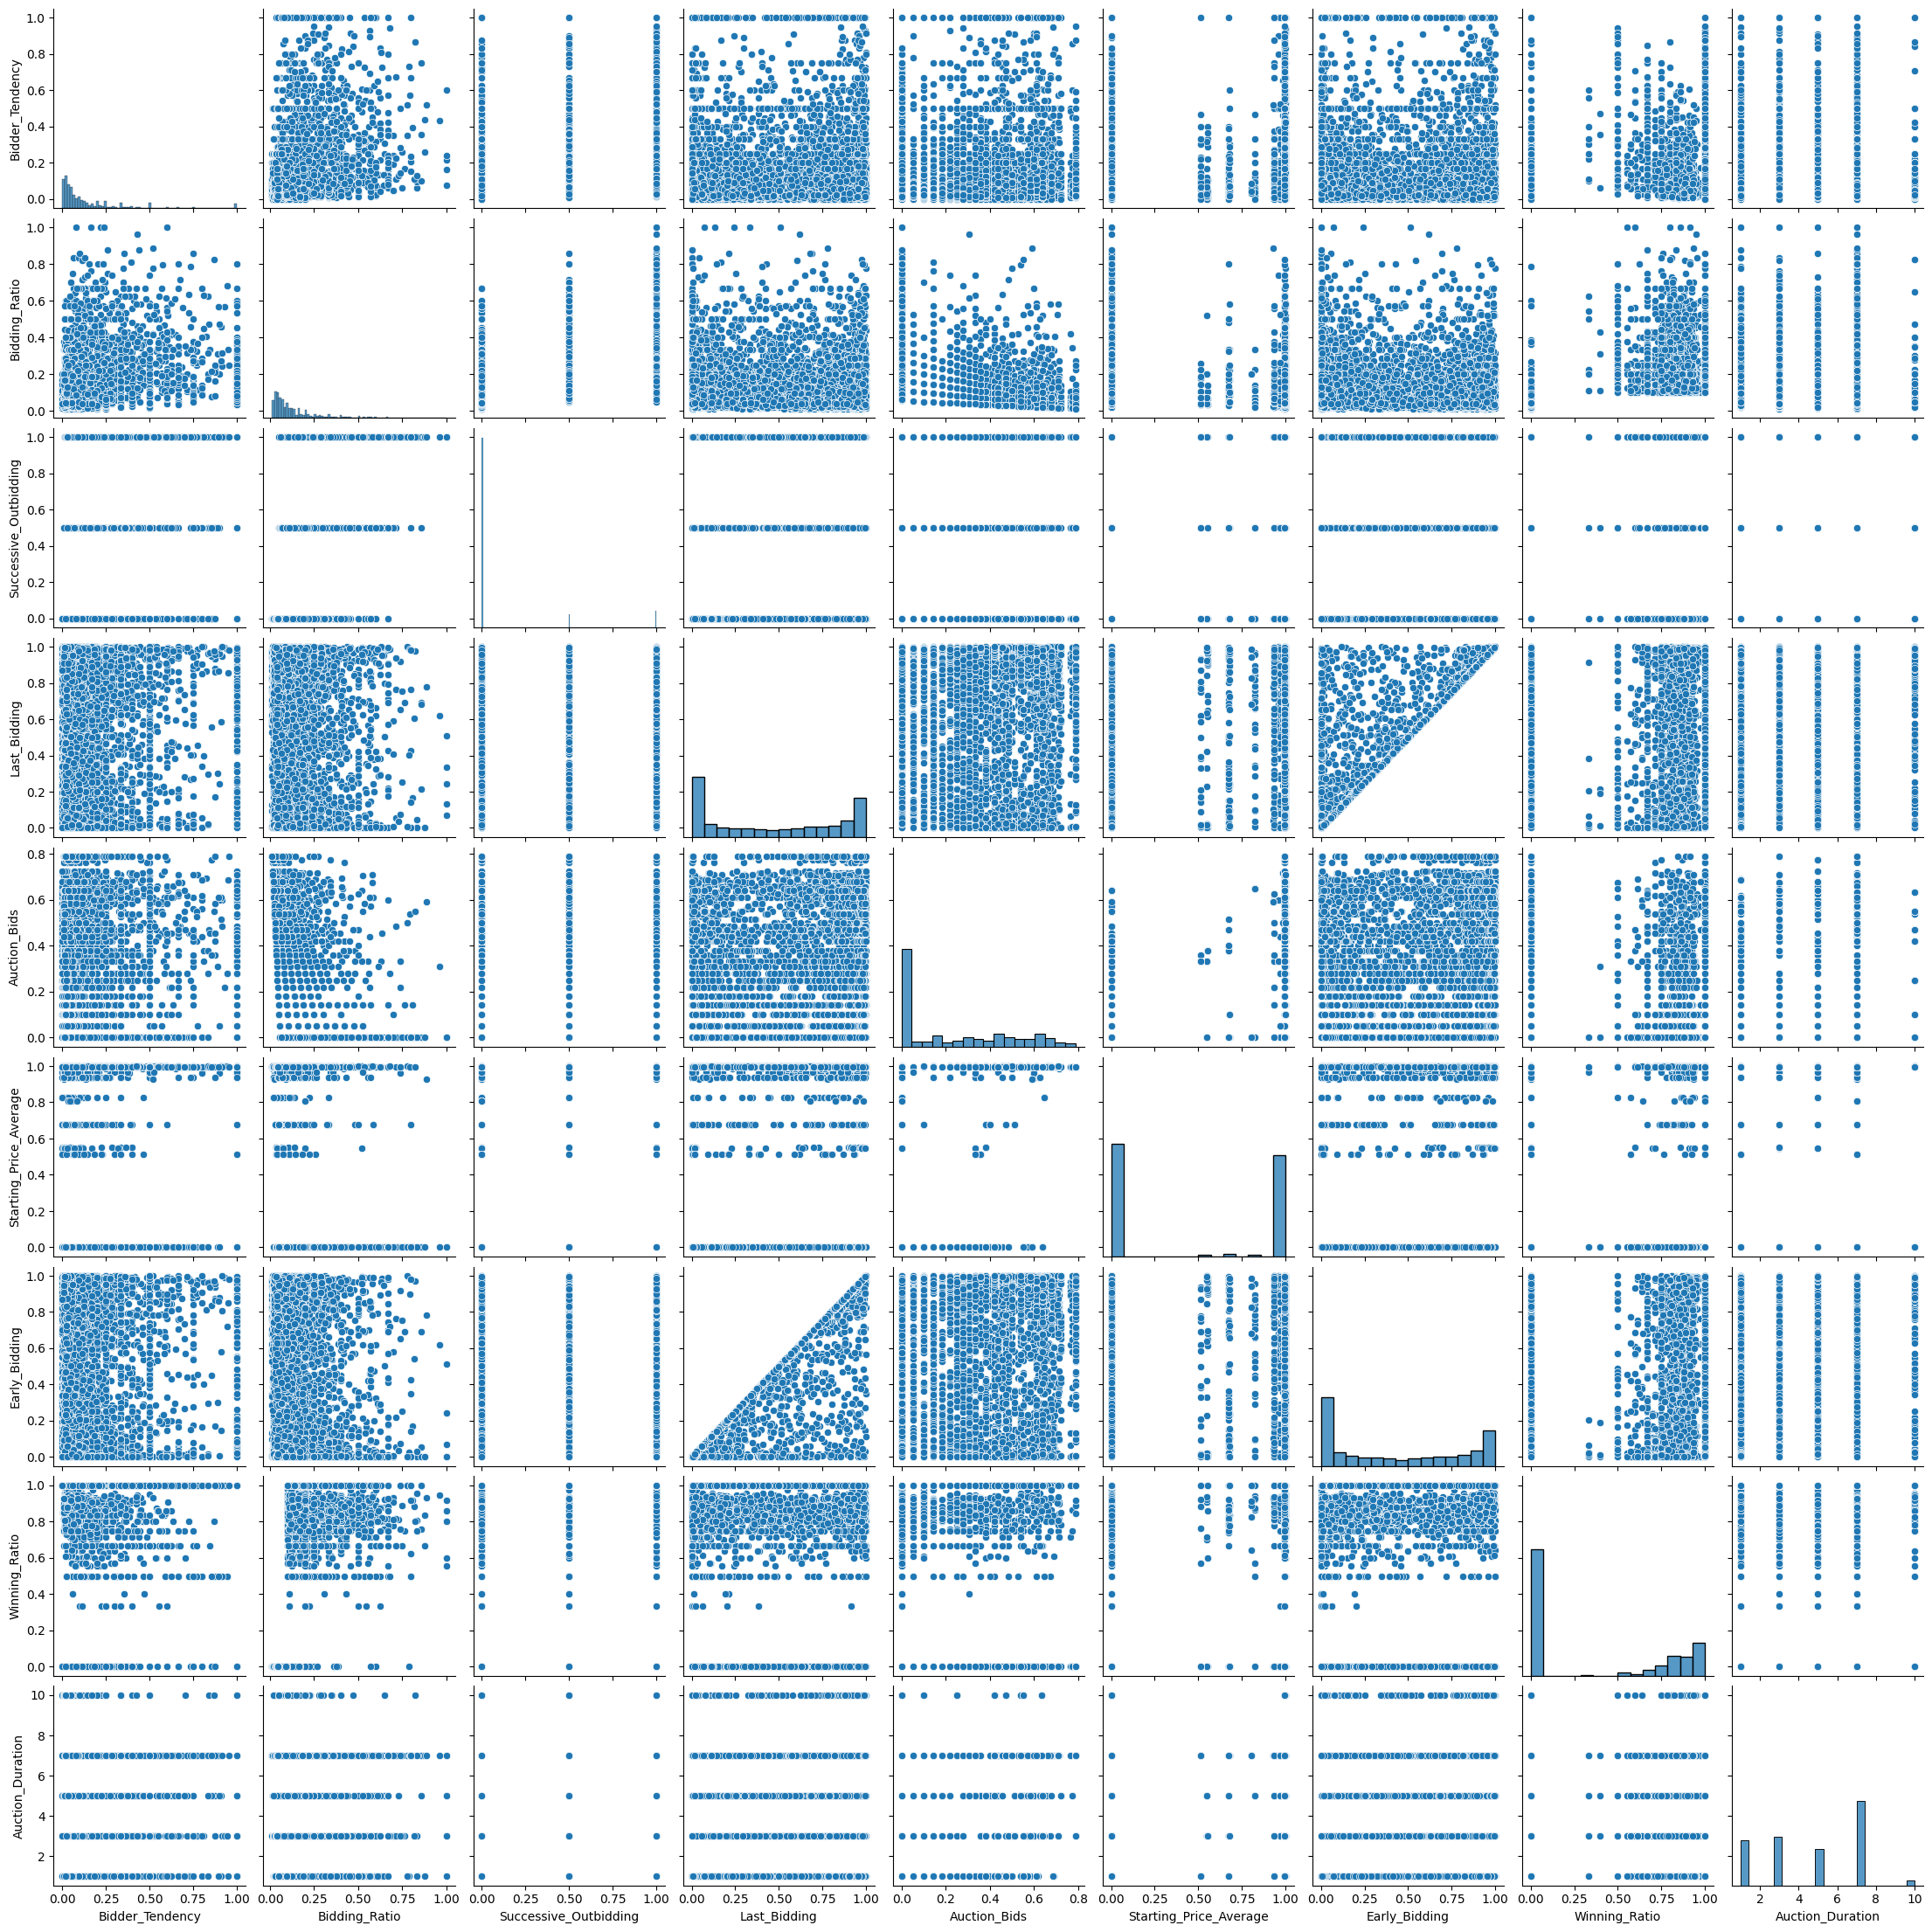

In [9]:
sns.pairplot(key_dataset)

### 2.2 Correlation Analysis
The correlation heatmap helps identify highly correlated features that may cause multicollinearity issues in clustering.


<Axes: >

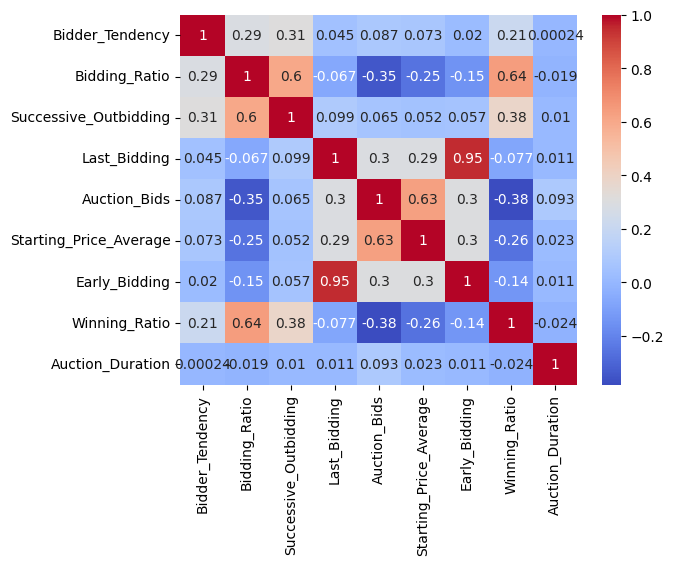

In [10]:
sns.heatmap(key_dataset.corr(), annot=True, cmap='coolwarm')

## 3. Data Preprocessing

### 3.1 Feature Selection and Standardization
- **Feature Removal:** Early_Bidding is removed due to high correlation (0.95) with Last_Bidding
- **Standardization:** All features are standardized using StandardScaler to ensure equal contribution to distance calculations in K-Means


In [183]:
from sklearn.feature_selection import VarianceThreshold

# drop early bidding as it has high correlation with last bid of 0.95 (almost identical)
selected_features = [
    'Bidder_Tendency',
    'Bidding_Ratio',
    'Last_Bidding',
    'Auction_Bids',
    'Winning_Ratio',
    'Auction_Duration',
    'Starting_Price_Average',
    'Successive_Outbidding',
]

X = key_dataset[selected_features]

vt = VarianceThreshold(threshold=0.0)
X_threshold = vt.fit_transform(X)

In [184]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_threshold)

## 4. Optimal Number of Clusters

### 4.1 Elbow Method
The elbow method plots Within-Cluster Sum of Squares (WCSS) against the number of clusters. The "elbow" point indicates the optimal number of clusters where adding more clusters provides diminishing returns.


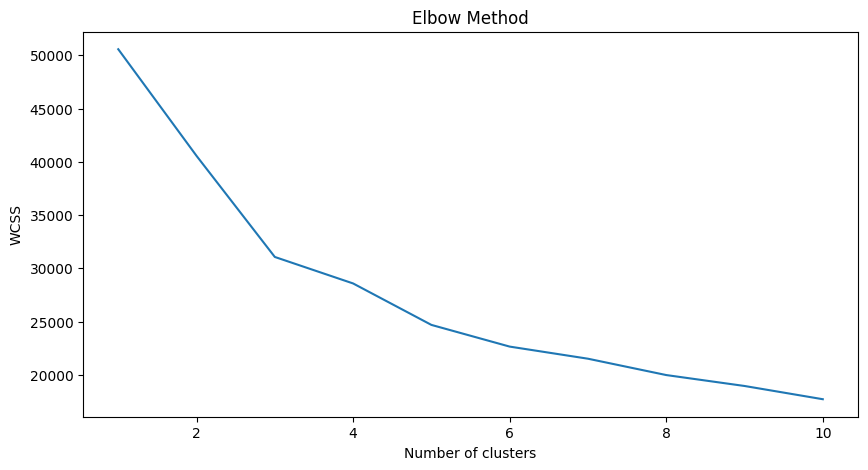

In [95]:
# using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [185]:
from sklearn.metrics import silhouette_score

for k in [3, 4, 5]:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k={k} → Silhouette Score = {score:.3f}')

k=3 → Silhouette Score = 0.261
k=4 → Silhouette Score = 0.267
k=5 → Silhouette Score = 0.247


In [194]:
# from the elbow method, we can see that the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
y_kmeans

array([2, 2, 2, ..., 1, 1, 1], shape=(6321,), dtype=int32)

## 5. Dimensionality Reduction for Visualization

Principal Component Analysis (PCA) is applied to reduce the 8-dimensional feature space to 2 dimensions for visualization purposes. Note: Clustering is performed on the full 8-dimensional space, not the reduced space.


In [188]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

array([0.31692234, 0.22602549])

In [189]:
sum(pca.explained_variance_ratio_)

np.float64(0.5429478274562278)

## 6. K-Means Clustering

Based on the elbow method, k=3 is selected as the optimal number of clusters. The visualization shows the clusters in 2D PCA space with centroids marked.


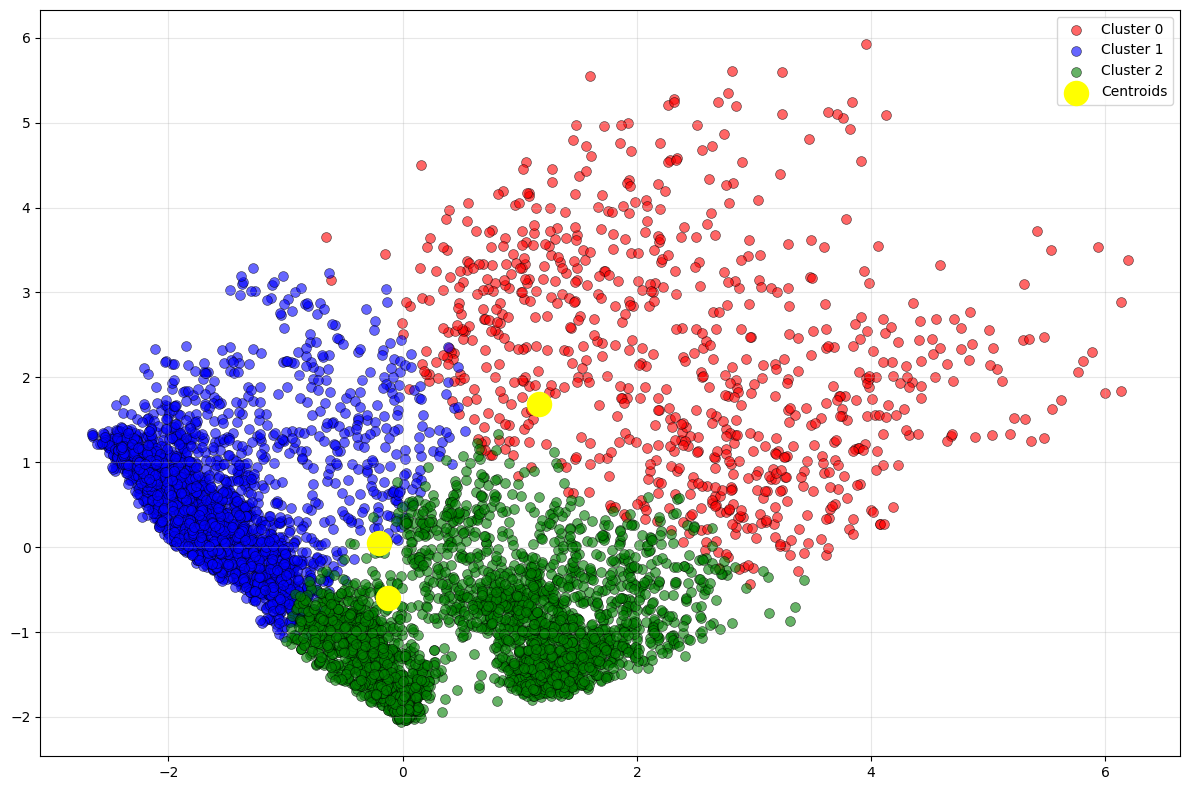

In [193]:
cluster_0_color = 'red'
cluster_1_color = 'blue'
cluster_2_color = 'green'

plt.figure(figsize=(12, 8))

mask_0 = y_kmeans == 0
plt.scatter(X_reduced[mask_0, 0], X_reduced[mask_0, 1], c=cluster_0_color, s=50, alpha=0.6, edgecolors='black', linewidth=0.5, label='Cluster 0')

mask_1 = y_kmeans == 1
plt.scatter(X_reduced[mask_1, 0], X_reduced[mask_1, 1], c=cluster_1_color, s=50, alpha=0.6, edgecolors='black', linewidth=0.5, label='Cluster 1')

mask_2 = y_kmeans == 2
plt.scatter(X_reduced[mask_2, 0], X_reduced[mask_2, 1], c=cluster_2_color, s=50, alpha=0.6, edgecolors='black', linewidth=0.5, label='Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label='Centroids')

plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Cluster Summary and Analysis

### 7.1 Cluster Distribution
This section provides basic statistics about cluster sizes and distributions.


In [201]:
# Add cluster labels to the feature dataset for analysis
dataset_with_clusters = key_dataset.copy()
dataset_with_clusters['Cluster'] = y_kmeans

# Cluster Summary Statistics
print("\nCluster Distribution (Percentage):")
print((dataset_with_clusters['Cluster'].value_counts(normalize=True).sort_index() * 100).round(2))
print(f"\nTotal number of clusters: {len(np.unique(y_kmeans))}")


Cluster Distribution (Percentage):
Cluster
0    12.48
1    38.93
2    48.58
Name: proportion, dtype: float64

Total number of clusters: 3


### 7.2 Detailed Cluster Statistics
Statistical summary (mean, std, min, max) for each feature across all clusters. This helps understand the characteristics that distinguish each cluster.


In [202]:
# Detailed cluster statistics for selected features
cluster_summary = dataset_with_clusters.groupby('Cluster')[selected_features].agg(['mean'])
print(cluster_summary)


        Bidder_Tendency Bidding_Ratio Last_Bidding Auction_Bids Winning_Ratio  \
                   mean          mean         mean         mean          mean   
Cluster                                                                         
0              0.371963      0.349953     0.564697     0.241569      0.859230   
1              0.118452      0.048945     0.602530     0.457664      0.059305   
2              0.102901      0.133648     0.325303     0.047890      0.488618   

        Auction_Duration Starting_Price_Average Successive_Outbidding  
                    mean                   mean                  mean  
Cluster                                                                
0               4.615970               0.510882              0.747782  
1               4.778139               0.905333              0.016863  
2               4.484207               0.116442              0.007978  


### 7.3 Cluster Behavioral Interpretation
Based on the cluster centroids and feature distributions, we interpret the behavioral patterns of each cluster.


In [132]:
# Cluster Behavioral Interpretation based on centroids
# Get centroids for interpretation
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original, columns=selected_features, index=[f'Cluster {i}' for i in range(3)])

print("\nCluster 0 - Bidding Pattern:")
print(f"  - Auction Bid: {centroids_df.loc['Cluster 0', 'Auction_Bids']:.3f}")
print(f"  - Bidder Tendency: {centroids_df.loc['Cluster 0', 'Bidder_Tendency']:.3f}")
print(f"  - Bidding Ratio: {centroids_df.loc['Cluster 0', 'Bidding_Ratio']:.3f}")
print(f"  - Starting Price: {centroids_df.loc['Cluster 0', 'Starting_Price_Average']:.3f}")
print(f"  - Winning Ratio: {centroids_df.loc['Cluster 0', 'Winning_Ratio']:.3f}")
print(f"  - Successive Outbidding: {centroids_df.loc['Cluster 0', 'Successive_Outbidding']:.3f}")
print(f"  - Last Bid: {centroids_df.loc['Cluster 0', 'Last_Bidding']:.3f}")

print("\nCluster 1 - Bidding Pattern:")
print(f"  - Auction Bid: {centroids_df.loc['Cluster 1', 'Auction_Bids']:.3f}")
print(f"  - Bidder Tendency: {centroids_df.loc['Cluster 1', 'Bidder_Tendency']:.3f}")
print(f"  - Bidding Ratio: {centroids_df.loc['Cluster 1', 'Bidding_Ratio']:.3f}")
print(f"  - Starting Price: {centroids_df.loc['Cluster 1', 'Starting_Price_Average']:.3f}")
print(f"  - Winning Ratio: {centroids_df.loc['Cluster 1', 'Winning_Ratio']:.3f}")
print(f"  - Successive Outbidding: {centroids_df.loc['Cluster 1', 'Successive_Outbidding']:.3f}")
print(f"  - Last Bid: {centroids_df.loc['Cluster 1', 'Last_Bidding']:.3f}")

print("\nCluster 2 - Bidding Pattern:")
print(f"  - Auction Bid: {centroids_df.loc['Cluster 2', 'Auction_Bids']:.3f}")
print(f"  - Bidder Tendency: {centroids_df.loc['Cluster 2', 'Bidder_Tendency']:.3f}")
print(f"  - Bidding Ratio: {centroids_df.loc['Cluster 2', 'Bidding_Ratio']:.3f}")
print(f"  - Starting Price: {centroids_df.loc['Cluster 2', 'Starting_Price_Average']:.3f}")
print(f"  - Winning Ratio: {centroids_df.loc['Cluster 2', 'Winning_Ratio']:.3f}")
print(f"  - Successive Outbidding: {centroids_df.loc['Cluster 2', 'Successive_Outbidding']:.3f}")
print(f"  - Last Bid: {centroids_df.loc['Cluster 2', 'Last_Bidding']:.3f}")


Cluster 0 - Bidding Pattern:
  - Auction Bid: 0.242
  - Bidder Tendency: 0.373
  - Bidding Ratio: 0.349
  - Starting Price: 0.512
  - Winning Ratio: 0.860
  - Successive Outbidding: 0.746
  - Last Bid: 0.566

Cluster 1 - Bidding Pattern:
  - Auction Bid: 0.457
  - Bidder Tendency: 0.118
  - Bidding Ratio: 0.049
  - Starting Price: 0.905
  - Winning Ratio: 0.058
  - Successive Outbidding: 0.017
  - Last Bid: 0.601

Cluster 2 - Bidding Pattern:
  - Auction Bid: 0.048
  - Bidder Tendency: 0.103
  - Bidding Ratio: 0.134
  - Starting Price: 0.115
  - Winning Ratio: 0.490
  - Successive Outbidding: 0.008
  - Last Bid: 0.326


## 8. Hierarchical (Agglomerative) Clustering

Agglomerative hierarchical clustering builds clusters bottom-up by repeatedly merging the two closest clusters. It does not require a pre-defined number of clusters when generating the dendrogram, and it can reveal the nested structure of the data.


### 8.1 Dendrogram and Linkage Selection

To understand the hierarchical structure we:
- Compute pairwise distances between samples (Euclidean)
- Apply a linkage method (Ward's method) that minimizes within-cluster variance when merging
- Plot a dendrogram to inspect how clusters merge at different distances and choose an appropriate cut level


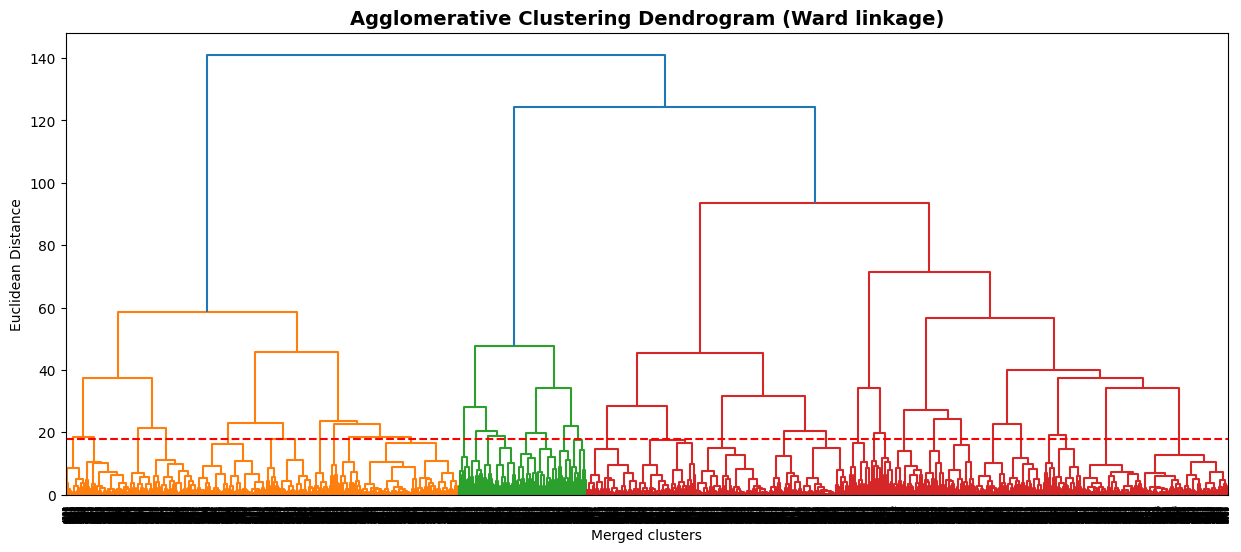

In [196]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Ward linkage emphasizes compact clusters similar to K-Means objective
plt.figure(figsize=(15, 6))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Agglomerative Clustering Dendrogram (Ward linkage)', fontsize=14, fontweight='bold')
plt.xlabel('Merged clusters')
plt.ylabel('Euclidean Distance')
plt.axhline(y=18, color='r', linestyle='--', label='Suggested cut height (~3 clusters)')
plt.show()

In [197]:
from sklearn.cluster import AgglomerativeClustering

cluster_range = range(2, 15)
agglomerative_results = []

for n_clusters in cluster_range:
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    agglomerative_results.append({'n_clusters': n_clusters, 'silhouette': score})
    print(f"n_clusters={n_clusters}: Silhouette Score = {score:.3f}")

agglomerative_df = pd.DataFrame(agglomerative_results)

n_clusters=2: Silhouette Score = 0.199
n_clusters=3: Silhouette Score = 0.236
n_clusters=4: Silhouette Score = 0.219
n_clusters=5: Silhouette Score = 0.234
n_clusters=6: Silhouette Score = 0.216
n_clusters=7: Silhouette Score = 0.231
n_clusters=8: Silhouette Score = 0.232
n_clusters=9: Silhouette Score = 0.217
n_clusters=10: Silhouette Score = 0.207
n_clusters=11: Silhouette Score = 0.201
n_clusters=12: Silhouette Score = 0.204
n_clusters=13: Silhouette Score = 0.208
n_clusters=14: Silhouette Score = 0.209


In [198]:

# Use optimal cluster for comparison with K-Means
optimal_cluster = agglomerative_df.loc[agglomerative_df['silhouette'].idxmax(), 'n_clusters']
agg_model = AgglomerativeClustering(n_clusters=optimal_cluster, linkage='ward')
y_agg = agg_model.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, y_agg)

print(f"\nSelected number of clusters: {optimal_cluster}")
print(f"Agglomerative silhouette score: {agg_silhouette:.3f}")



Selected number of clusters: 3
Agglomerative silhouette score: 0.236


### 8.3 Agglomerative Clustering Visualization

Visualization of the Agglomerative clustering assignments in PCA space.


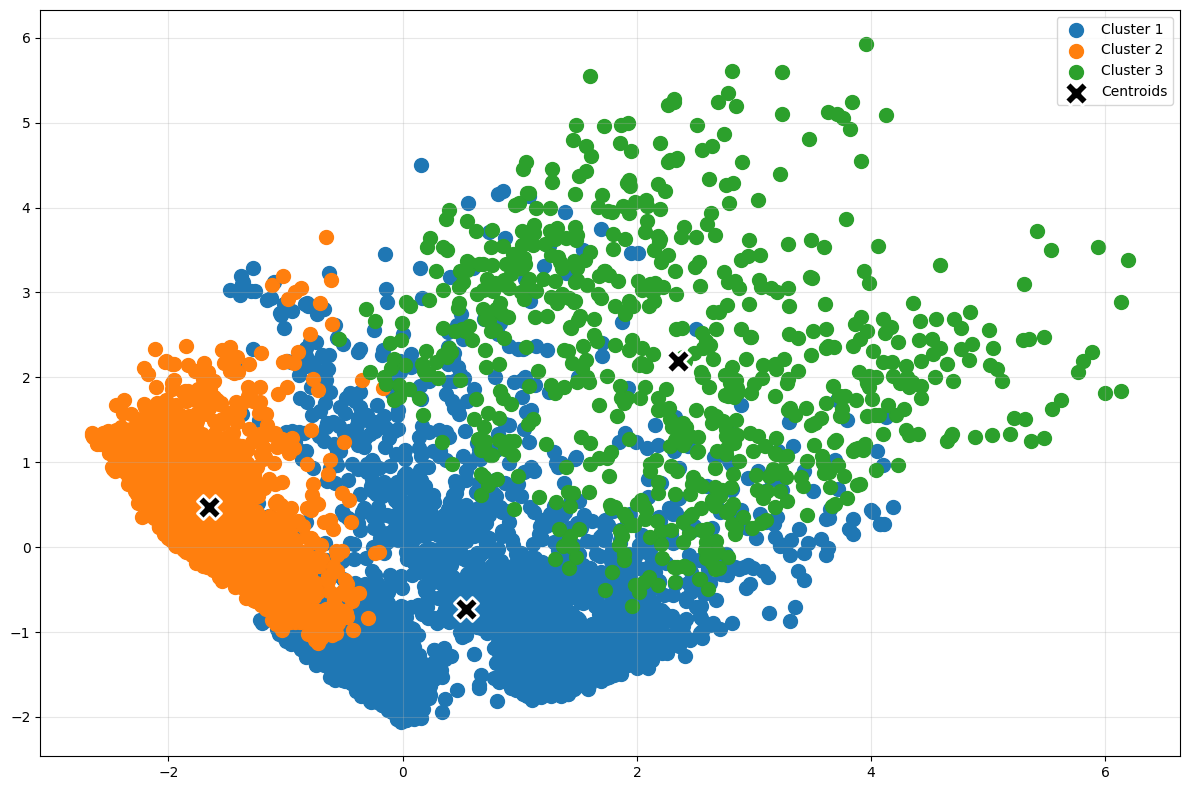

In [199]:
# Visualize Agglomerative clustering assignments
plt.figure(figsize=(12, 8))
agg_colors = ["red", "blue", "green"]

n_clusters = optimal_cluster

# mean of each feature within each cluster in *scaled* space
centroids_scaled = np.vstack([X_scaled[y_agg == i].mean(axis=0) for i in range(n_clusters)])
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids_original, columns=selected_features, index=[f'Cluster {i}' for i in range(n_clusters)])
centroids_pca = pca.transform(centroids_scaled)


for i in range(optimal_cluster):    plt.scatter(X_reduced[y_agg == i, 0], X_reduced[y_agg == i, 1], s=100, label=f'Cluster {i+1}')
plt.scatter(
    centroids_pca[:,0],
    centroids_pca[:,1],
    s=300, marker='X', c='black', edgecolor='white', linewidth=2,
    label="Centroids"
)


plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 8.4 Agglomerative Cluster Analysis

Analysis of Agglomerative cluster centroids and behavioral profiles.


In [176]:
# Agglomerative clustering summary

print(f"Linkage: Ward")
print(f"Number of clusters: {optimal_cluster}")
print(f"Silhouette Score: {agg_silhouette:.3f}")

agg_counts = pd.Series(y_agg).value_counts().sort_index()
print("\nCluster Distribution:")
for cluster_id, count in agg_counts.items():
    print(f"  Cluster {cluster_id}: {count} points ({(count/len(y_agg))*100:.2f}%)")

Linkage: Ward
Number of clusters: 3
Silhouette Score: 0.236

Cluster Distribution:
  Cluster 0: 3488 points (55.18%)
  Cluster 1: 2138 points (33.82%)
  Cluster 2: 695 points (11.00%)


In [177]:
# Analyze Agglomerative clusters
agg_dataset = key_dataset.copy()
agg_dataset['Cluster'] = y_agg

cluster_summary = agg_dataset.groupby('Cluster')[selected_features].agg(['mean'])
print(cluster_summary)


        Bidder_Tendency Bidding_Ratio Last_Bidding Auction_Bids Winning_Ratio  \
                   mean          mean         mean         mean          mean   
Cluster                                                                         
0              0.140029      0.137212     0.381911     0.099685      0.494628   
1              0.094364      0.043442     0.567029     0.438961      0.000000   
2              0.303349      0.338885     0.551027     0.255798      0.862110   

        Auction_Duration Starting_Price_Average Successive_Outbidding  
                    mean                   mean                  mean  
Cluster                                                                
0               4.490539               0.155748              0.014478  
1               4.761459               0.976649              0.013798  
2               4.789928               0.514214              0.828777  


In [178]:
print("\nCluster 0 - Bidding Pattern:")
print(f"  - Auction Bid: {centroids_df.loc['Cluster 0', 'Auction_Bids']:.3f}")
print(f"  - Bidder Tendency: {centroids_df.loc['Cluster 0', 'Bidder_Tendency']:.3f}")
print(f"  - Bidding Ratio: {centroids_df.loc['Cluster 0', 'Bidding_Ratio']:.3f}")
print(f"  - Starting Price: {centroids_df.loc['Cluster 0', 'Starting_Price_Average']:.3f}")
print(f"  - Winning Ratio: {centroids_df.loc['Cluster 0', 'Winning_Ratio']:.3f}")
print(f"  - Successive Outbidding: {centroids_df.loc['Cluster 0', 'Successive_Outbidding']:.3f}")
print(f"  - Last Bid: {centroids_df.loc['Cluster 0', 'Last_Bidding']:.3f}")

print("\nCluster 1 - Bidding Pattern:")
print(f"  - Auction Bid: {centroids_df.loc['Cluster 1', 'Auction_Bids']:.3f}")
print(f"  - Bidder Tendency: {centroids_df.loc['Cluster 1', 'Bidder_Tendency']:.3f}")
print(f"  - Bidding Ratio: {centroids_df.loc['Cluster 1', 'Bidding_Ratio']:.3f}")
print(f"  - Starting Price: {centroids_df.loc['Cluster 1', 'Starting_Price_Average']:.3f}")
print(f"  - Winning Ratio: {centroids_df.loc['Cluster 1', 'Winning_Ratio']:.3f}")
print(f"  - Successive Outbidding: {centroids_df.loc['Cluster 1', 'Successive_Outbidding']:.3f}")
print(f"  - Last Bid: {centroids_df.loc['Cluster 1', 'Last_Bidding']:.3f}")

print("\nCluster 2 - Bidding Pattern:")
print(f"  - Auction Bid: {centroids_df.loc['Cluster 2', 'Auction_Bids']:.3f}")
print(f"  - Bidder Tendency: {centroids_df.loc['Cluster 2', 'Bidder_Tendency']:.3f}")
print(f"  - Bidding Ratio: {centroids_df.loc['Cluster 2', 'Bidding_Ratio']:.3f}")
print(f"  - Starting Price: {centroids_df.loc['Cluster 2', 'Starting_Price_Average']:.3f}")
print(f"  - Winning Ratio: {centroids_df.loc['Cluster 2', 'Winning_Ratio']:.3f}")
print(f"  - Successive Outbidding: {centroids_df.loc['Cluster 2', 'Successive_Outbidding']:.3f}")
print(f"  - Last Bid: {centroids_df.loc['Cluster 2', 'Last_Bidding']:.3f}")


Cluster 0 - Bidding Pattern:
  - Auction Bid: 0.100
  - Bidder Tendency: 0.140
  - Bidding Ratio: 0.137
  - Starting Price: 0.156
  - Winning Ratio: 0.495
  - Successive Outbidding: 0.014
  - Last Bid: 0.382

Cluster 1 - Bidding Pattern:
  - Auction Bid: 0.439
  - Bidder Tendency: 0.094
  - Bidding Ratio: 0.043
  - Starting Price: 0.977
  - Winning Ratio: 0.000
  - Successive Outbidding: 0.014
  - Last Bid: 0.567

Cluster 2 - Bidding Pattern:
  - Auction Bid: 0.256
  - Bidder Tendency: 0.303
  - Bidding Ratio: 0.339
  - Starting Price: 0.514
  - Winning Ratio: 0.862
  - Successive Outbidding: 0.829
  - Last Bid: 0.551
